# Intro

* About Bellabeat ...
* About goals
* About Data    

# Step 1: Ask
1. ASK
    1. What problem are you trying to solve: 
        1. What are trends in smart device usage?
        2. Could these trends apply to bellabeat customers
        3. Could these trends help the marketing strategy
    2. Identify Business task
    3. How can your insight help?
2. Stakeholders 
   1. Urska Srsen and The team
3. Deliverable
    1. Summary of business task
    2. Description of data sources used
    3. Document any cleaning and manipulation of data
    4. Summary of analysis
    5. Supporting Viz
    6. High-level viz and key findings
4. **Business task**: Analyze the Fitbit user data and understand what trends exist for users and what can Bellabeat learn from that when developing a better product & marketing strategy.

# Step 2: PREPARE
1. Guiding Questions
    1. Where is data stored, organized, format
        * Kaggle, stored in 18 CSV files
        * Jupyter Notebook & Python will be used to analyze the data. 
    2. Credibility & ROCC (Reliable, Original, Comprehensive, Current, Cited)
        * Reliable: The data has the minimum number size for a sample size (30) which is the minimum for most analysis.
        * Original: The data is collected by a third party.
        * Comprehensive: There is a large amount of data (for a short period of time), in both wide and long format.
        * Current: The data is old 03.12.2016 - 05.12.2016
        * Cited: There is little info on data collected by the third party.
    3. Privacy, security 
        * There is no info on the users, data is anonymous.

#

# Step 3: Process

1. Tools
    * I will be using Jupyter Notedbook with Python


In [15]:
# Import Packages
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
from matplotlib import pyplot as plt 
 # data visualization
import datetime as dt # date time

2. Importing Data set

In [16]:
dfactive = pd.read_csv('fitbit_data/dailyActivity_merged.csv')
dfactive.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


## Clean Data
#### A. Check for Null values
We first check if there any null values in our datafram

In [17]:
dfactive.isnull().values.any()

False

There are no **null** values in this data frame

#### B. Check for duplicates and conistency
there are supposed to be 30 participants we see that 'Id' is a primary key, so we will count all the unique values to confirm this.

In [18]:
#Checking the number of unique Id's
len(dfactive.Id.unique())

33

From this we can see that there are 33 Id's, possibly more than 30 participants were involved, other possibility is users have more than one ID or duplicates entries. 

Let's Check and remove duplicates

In [19]:
# Let's see the shape of our data frame, 
dfactive.shape

(940, 15)

From here we can see that there are 940 rows currently in the dataframe, next we drop duplicate dataframes

In [20]:
dfactive.drop_duplicates().shape

(940, 15)

As we can see there are no exact duplicates in this dataframe, as the duplicates is exactly the same shape 940 rows.

Next we can see if there are any rows with 0 values, meaning no vlaues were tracked at all. We will create a new column 'TotalMinutes' that will count all entries with 0 minutes of activies. 

In [21]:
dfactive['TotalMinutes'] = dfactive['VeryActiveMinutes'] + dfactive['FairlyActiveMinutes'] + dfactive['LightlyActiveMinutes'] + dfactive['SedentaryMinutes']

In [22]:
dfactive[dfactive['TotalMinutes'] == 0].count()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
TotalMinutes                0
dtype: int64

From this we can see that all rows have at least 1 minute of activity. 

#### C. Check Column Format 
Finally let's check that all columns are in the correct format.

In [23]:
dfactive.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
TotalMinutes                  int64
dtype: object

Here we can see that column Activity Date is in the wrong format, let's covert it to a Date format.

In [64]:
dfactive['ActivityDate'] = pd.to_datetime(dfactive['ActivityDate'], format="%m/%d/%Y")
dfactive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

#### Normalize Activity Minutes
To better compare the type of activities we normalize all the minutes (0 to 1) and compare the make-up of activity types per day. 

In [104]:
min_prcnt = dfactive[['ActivityDate' ,'VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].copy()
min_prcnt['TotalMinutes'] = min_prcnt['VeryActiveMinutes'] + min_prcnt['FairlyActiveMinutes'] + min_prcnt['LightlyActiveMinutes'] + min_prcnt['SedentaryMinutes']
for x in min_prcnt.columns:
    if (x != 'ActivityDate') & (x != 'TotalMinutes'):
        min_prcnt[x + "PCNT"] = min_prcnt[x]/ min_prcnt['TotalMinutes'].round(2)

min_prcnt.drop(['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','TotalMinutes'], axis=1, inplace=True)
min_prcnt.head()

,ActivityDate,VeryActiveMinutesPCNT,FairlyActiveMinutesPCNT,LightlyActiveMinutesPCNT,SedentaryMinutesPCNT
0,2016-04-12,0.022852,0.011883,0.299817,0.665448
1,2016-04-13,0.020329,0.018393,0.210068,0.751210
2,2016-04-14,0.020833,0.007639,0.125694,0.845833
3,2016-04-15,0.029058,0.034068,0.209419,0.727455
4,2016-04-16,0.034615,0.009615,0.212500,0.743269


### Process Conclusion
1. We've noticed that there are more IDs that there should be 33, not 30. 
    * However we checked for duplicates and found none
    * We also checked that there are no entries with zero minutes of activity
2. We've converted the 'ActivityDate' column in the the proper format (datetime64)

# Analysis 
Let's start by analyzing the general statistics from the dataframe

In [67]:
dfactive.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000


#### Box Plot Chart of Total Steps 

<AxesSubplot:>

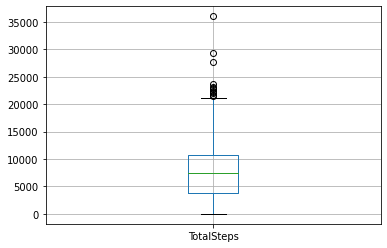

In [71]:
dfactive.boxplot(column=['TotalSteps'], grid=True)

#### Engaged Users
Since there are 1440 minutes how many of the users have used their Fitbit all day, including sleeping.  


In [139]:
dfactive[dfactive['TotalMinutes'] == 1440].shape

(478, 16)

In [140]:
dfactive[dfactive['TotalMinutes'] != 1440].shape

(462, 16)

**Conclusion**
We can see that a bit more than half of the entries are for full days, while the rest are partial loggings of activities.

#### Findings
* 'TotalMinutes' Show that not all users kept the Fitbit on the whole time. (24x60 = 1440), Any Daily user log with less that 1440 minutes means the Fitbit was off or not logging activities.
* On average we can see that users logged most of the day 1218 but not the whole day. 
* Looking at the box plot of Total Steps taken, we can see there are quite a few outliers, where some points logging much more steps, way above 20,000 steps with the average 7637 steps. 
* We can see that 50.8% of the entries are for full days, meaning that sleep and other sedentary activities were tracked, and not only athletic-type activities. 

# Share 

#### Total Time
We would like to see the frequence of use, and see if there is a drop-off or increase of activity as the user uses the Fitbit

In [25]:
#We group the dataframe by date and measure the total minutes of any activity.
time_active = dfactive.groupby('ActivityDate')['TotalMinutes'].sum().reset_index()

<AxesSubplot:xlabel='ActivityDate'>

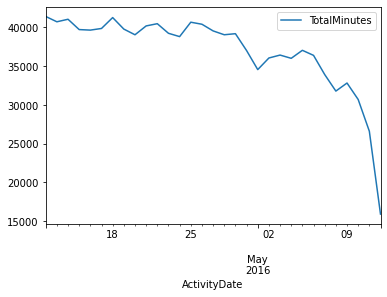

In [26]:
#Let's plot the 'time_active' dataframe on a plot
time_active.plot(x ='ActivityDate', y='TotalMinutes', kind = 'line')

**Conclusion**  
We can clearly observe a decrease in FitBit usage over the time period, first there is a gradual drop-off followed by an exponentially steep drop-off.

Next step is to see if the type Activity Minutes changes by mapping all type of activity 


#### Active Minute Types over Time
Let's explore and see the types of activities, and if those activities decreased over time as well.


/Users/sam/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='ActivityDate'>

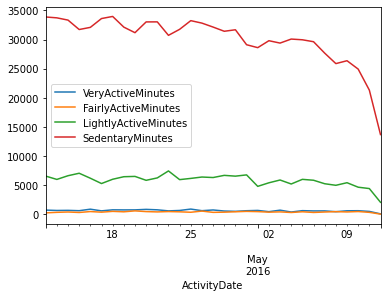

In [27]:
all_minutes = dfactive.groupby('ActivityDate')['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes'].sum().reset_index()
all_minutes.plot(x = 'ActivityDate', kind = 'line')

**Conclusion**  
This is inline with our earlier analysis, there is an overall decrease in all types of activity with the 'Very Active' and 'Fairly Active' minutes remaining at very low levels, with most the minutes being made up of 'Sedentary' activities. 


#### Normalized Activity Minutes
Here we compare the make up of each day by what time of activity that it comprimised of. 
First we group by day and the average out the results.

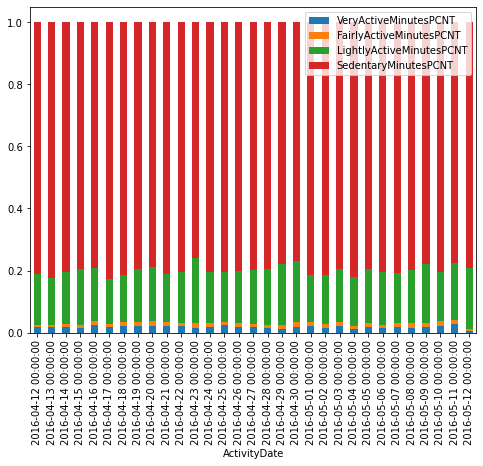

In [132]:
min_prcnt2 = min_prcnt.groupby('ActivityDate')[['VeryActiveMinutesPCNT','FairlyActiveMinutesPCNT','LightlyActiveMinutesPCNT','SedentaryMinutesPCNT']].mean().reset_index()
ax = min_prcnt2.plot.bar(x='ActivityDate', stacked=True, figsize=(8,6))


**Conclusion**  
Users actvities did not change much through out the period. Most of the activity is sedentary, followed by lightly active, then fairly active and finally very active. 
We don't see an increase of more active time as time progresses. 

#### Distance  over Time
Now let's review if there was a change of distance traveled over time as users were using the FitBit.
* We will compare the sum of total distance to the average total distance

<AxesSubplot:xlabel='ActivityDate'>

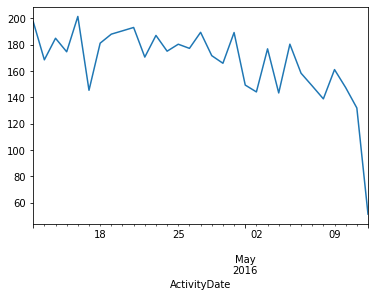

In [61]:
#Total Distance Per Day
dfactive.groupby('ActivityDate')['TotalDistance'].sum().plot(x='Activity Date', y='TotalDistance')

<AxesSubplot:xlabel='ActivityDate'>

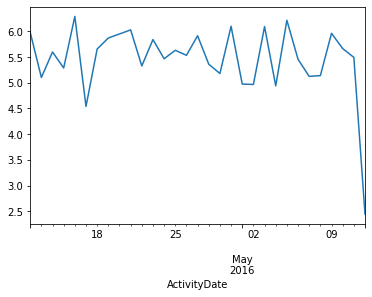

In [63]:
#Average Distance Per Day
dfactive.groupby('ActivityDate')['TotalDistance'].mean().plot(x='Activity Date', y='TotalDistance')

**Conclusion**  
We can see a gradual decline of Distance over the time the users log-in and use the Fitbit, however once we look at the averages we can see they are logging in for the most part similar distances.
* This can idicate that that users are using the Fitbit less often, but when they do use it they are logging in similar distances. 

# ACT
Let's combine our insight and show what Bellabeat can take away from Fitbit's analysis.

Let's review the goals and the business task and see what high-level recommendations can be found.

**Business task**: Analyze the Fitbit user data and understand what trends exist for users and what can Bellabeat learn from that when developing a better product & marketing strategy.

## Trends of Fitbit users
* Overall total usage of the Fitbit **decreased** with time, users were logging in less minutes on their fitbits as time went on.
* Roughly half of the users (50.8%) logged their entire day (1440 minutes), while the rest only used their Fitbits a part of the day.
* Over time the amount of athletic time (Active Minutes) did not change, possibly reflecting that the Fitbit had little to no impact on their physical activity.


## Bellabeat Comparison
* Bellabeat and Fitbit are very similar type of product: a wearable high-tech product that tracks and gives feedback on the users activity throughout the day. These trends can possibly reflect Bellabeat user's experience and habits. Therefore the trends identified in this study can apply to Bellabeat's products.

## Bellabeat Insight
* The drop-off in minutes logged should be a trend that is closely watched by Bellabeat. Features should be included that encourage users to continue to use Bellabeat with time.
    * Gamification: Having game-like features that encourage users to login more minutes and to constantly wear their Bellabeat 
    * Reminders: Reminders that are sent to the user if there is a change in habit and the user using Bellabeat less that before. 
* Encourage more active minutes through out the day, Bellabeat should encourage the users' healthier habits, and to encourage that with time a larger percentage of the user's day is done with more active activities. 
* All of these features, especially the new habit-forming features, should be communicated through out the marketing campaign. 

## Limitations
* In addition to all the data limitations, ROCC issues listed at the beginning of this study more analysis should be completed on not only this dataset but on Fitbit as a whole. There is no information on the version of Fitbit being used and the features that were included. Furthermore that issues listed at the beginning of this study were not resolved and a further more extensive study is needed to confirm these trends. 